<a href="https://colab.research.google.com/github/avinashsingh16/daily-python-numpy-pandas/blob/main/Automobile_model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
path = '/content/drive/MyDrive/datasets/automobile_data.csv'

In [31]:
auto_df = pd.read_csv(path)

In [32]:
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [33]:
# Build a price prediction model using features like horsepower, engine-size, fuel-type, etc.
# check if horsepower column has NaN
auto_df['horsepower'].isna().sum()

# check if fuel-type has NaN
auto_df['fuel-type'].isna().sum()

#check if engine-size has NaN
auto_df['engine-size'].isna().sum()

np.int64(0)

In [34]:
for col in auto_df.columns:
    if auto_df[col].dtype == 'object':
        if (auto_df[col] == '?').any():
            print(f"Column '{col}' has '?' values")

Column 'normalized-losses' has '?' values
Column 'num-of-doors' has '?' values
Column 'bore' has '?' values
Column 'stroke' has '?' values
Column 'horsepower' has '?' values
Column 'peak-rpm' has '?' values
Column 'price' has '?' values


In [35]:
auto_df.replace('?',np.nan,inplace=True)

#convert string in to numeric form
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'])

#filling every NaN value to median value
auto_df['horsepower'].fillna(auto_df['horsepower'].median(),inplace=True)

/tmp/ipython-input-35-1806165587.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  auto_df['horsepower'].fillna(auto_df['horsepower'].median(),inplace=True)


In [36]:
#convert string in to numeric form
auto_df['price'] = pd.to_numeric(auto_df['price'])

#filling every NaN value to median value
auto_df['price'].fillna(auto_df['price'].median(),inplace=True)

/tmp/ipython-input-36-1036144379.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  auto_df['price'].fillna(auto_df['price'].median(),inplace=True)


In [37]:
# import labelencode to convert fuel column in to binary i.e0 and 1
from sklearn.preprocessing import LabelEncoder

#instantiate the labelencoder
encoder = LabelEncoder()

#converting fuel-type in to binary
auto_df['fuel-type'] = encoder.fit_transform(auto_df['fuel-type'])

In [38]:
from sklearn.model_selection import train_test_split

# seletc train and test data for training model
# select feature and target
X = auto_df[['engine-size','horsepower','fuel-type']]
y = auto_df['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
# train the model using linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [43]:
#Evaluate the model
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score

y_pred = model.predict(X_test)
print("R2_score:", r2_score(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

R2_score: 0.8112505820605418
MSE: 14806148.139701543


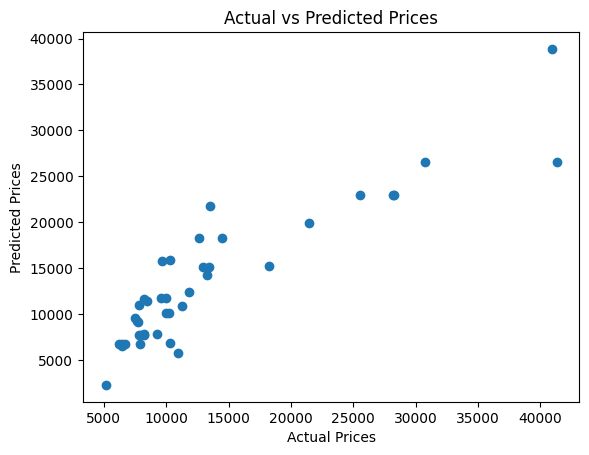

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()